# Image Augmentation

This notebook will walk through how to use Keras for image augmentation

In [1]:
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_images(imgs, rows=1, figsize=(20,8), fontsize=14):
    figure = plt.figure(figsize=figsize)
    cols = max(1,len(imgs) // rows-1)
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols+1, i+1)
        plt.tick_params(
            axis='both',
            which='both',
            bottom=False,
            top=False,
            left=False,
            right=False,
            labelbottom=False,
            labelleft=False)
        plt.imshow(imgs[i][:,:,0], cmap='Greys')
        
    plt.show()

# Keras Image Processors
There are several built in image processors within Keras. Let's explore some here

In [32]:
from keras.preprocessing.image import (
    random_rotation, random_shift, random_shear, random_zoom,
    random_channel_shift, img_to_array, ImageDataGenerator)

Let's choose one image to demonstrate how these work

(28, 28)


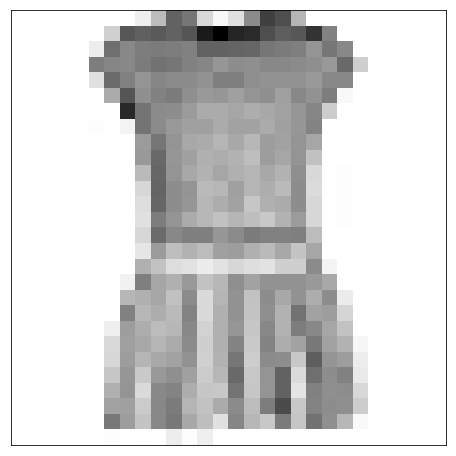

In [37]:
print(np.shape(x_train[0]))
x_train_data = x_train.reshape(-1, 28, 28, 1)
img = x_train_data[3]
plot_images([img])

First, let's take a look at random_shift that shifts an image around the space

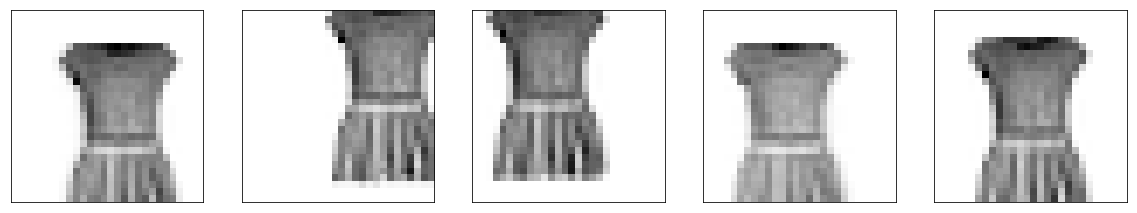

In [34]:
img_shift = [ random_shift(
    img, 
    wrg=0.3, 
    hrg=0.2, 
    row_axis=0, 
    col_axis=1, 
    channel_axis=2, 
    fill_mode='constant',
    cval=0
) for _ in range(5)]

plot_images(img_shift)

## Rotation
This rotates an image in various rotations

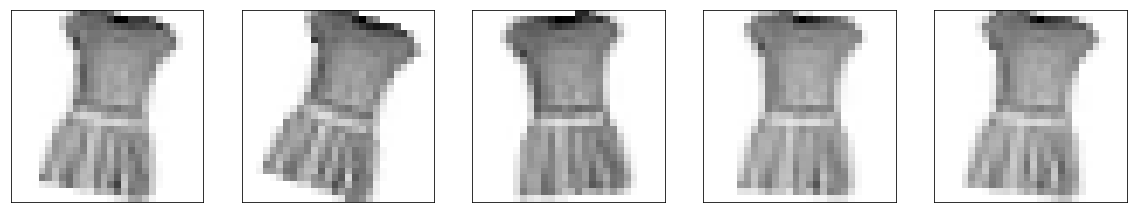

In [8]:
img_rotate = [ random_rotation(
    img, 
    20, 
    row_axis=0, 
    col_axis=1, 
    channel_axis=2, 
        fill_mode='constant',
    cval=0
) for _ in range(5)]

plot_images(img_rotate)

## Shear
Let's look at how to perform shearing

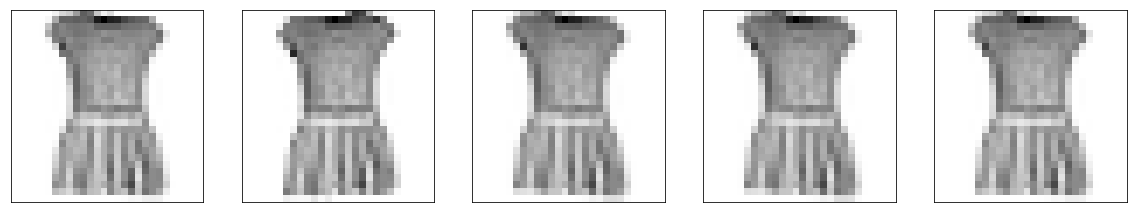

In [40]:
img_shear = [ random_shear(
    img,
    intensity=4.5,
    row_axis=0,
    col_axis=1,
    channel_axis=2,
    fill_mode='constant',
    cval=0
) for _ in range(5)]

plot_images(img_shear)

# Zoom
Let's take a look at different zooms

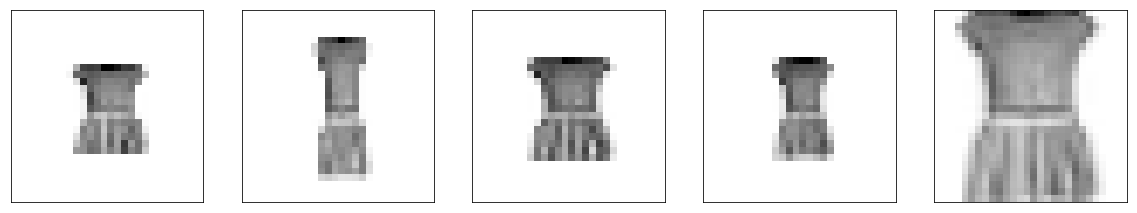

In [13]:
img_zoom = [ random_zoom(
    img,
    zoom_range=(0.7,2.3),
    row_axis=0,
    col_axis=1,
    channel_axis=2,
    fill_mode='constant',
    cval=0
) for _ in range(5)]

plot_images(img_zoom)

# Combining them
Rather than having to do these transformations individually, you can package it all up in one go via the ImageDataGenerator

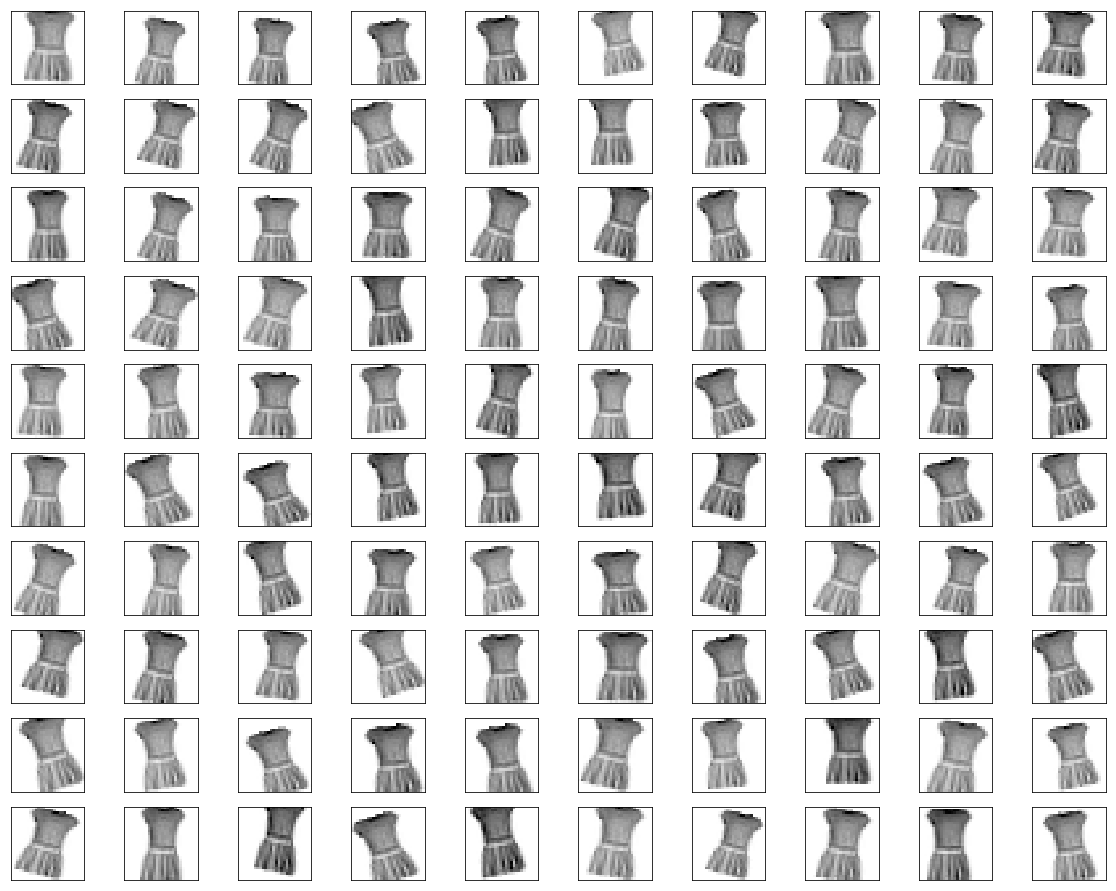

In [11]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.8,
        zoom_range=(0.7, 1.3),
        horizontal_flip=False,
        vertical_flip=False, 
        fill_mode='constant',
        cval=0
)

counter = 0

image_dataset = []
for x_batch in datagen.flow(img.reshape((1,) + img.shape), batch_size=max_batches):
    image_dataset.append(x_batch[0])
    counter += 1
    if counter >= 100:
        break
        
plot_images(image_dataset, rows=10, figsize=(20,16))